In [1]:
%pylab inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import datasets

Populating the interactive namespace from numpy and matplotlib


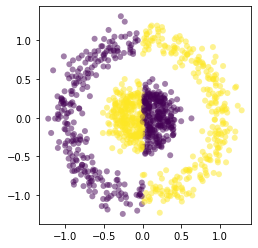

In [2]:
#data set creation
seed = 0;

x,y = datasets.make_circles(n_samples=1000,factor=0.25, noise=.12)

a = x[:,0] > 0
y[a] = np.absolute(y[a]-1)

#plot
plt.subplot(111,aspect='equal'); 
plt.scatter(x[:,0],x[:,1], c = y, alpha=0.5,edgecolor='none'); 

/Users/William/anaconda3/envs/ndd/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


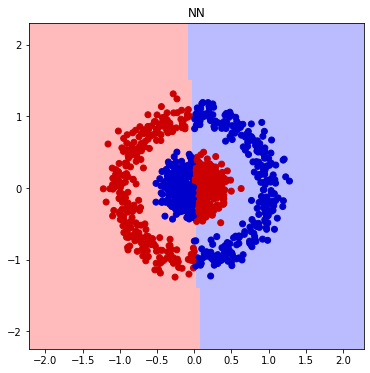

In [3]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB', '#BBBBFF'])
cmap_bold = ListedColormap(['#CC0000', '#00AA00', '#0000CC'])

#Grid Setup
h = 0.05 # grid step size
X = x.copy()
Y = y.copy()
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1 # grid has x value from x_min to x_max
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1 # grid has y value from y_min to y_max
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()] # ravel: put all entried of matrix into a flattened vector

clf =  MLPClassifier(hidden_layer_sizes=(100,), activation='identity', solver='adam', max_iter=2000, random_state=seed) # create classifier object

ZZ = clf.fit(X,Y).predict(grid) # predicting on the grid
ZZ = ZZ.reshape(xx.shape) # reshaping

# Plot the decision boundary
plt.figure(figsize=(6,6));
plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light);
    
# Plot the training points
plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold);
plt.xlim(xx.min(), xx.max());
plt.ylim(yy.min(), yy.max());
plt.title('NN');

/Users/William/anaconda3/envs/ndd/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


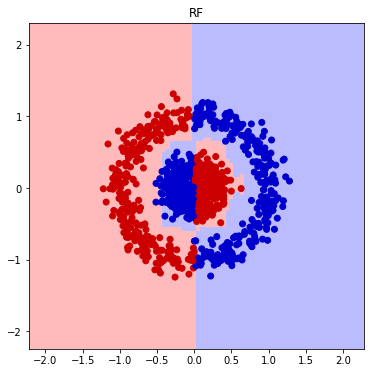

In [4]:
#Grid Setup
h = 0.05 # grid step size
X = x.copy()
Y = y.copy()
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1 # grid has x value from x_min to x_max
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1 # grid has y value from y_min to y_max
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()] # ravel: put all entried of matrix into a flattened vector

clf =  RandomForestClassifier(max_depth=10, random_state=seed) # create classifier object

ZZ = clf.fit(X,Y).predict(grid) # predicting on the grid
ZZ = ZZ.reshape(xx.shape) # reshaping

# Plot the decision boundary
plt.figure(figsize=(6,6));
plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light);
    
# Plot the training points
plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold);
plt.xlim(xx.min(), xx.max());
plt.ylim(yy.min(), yy.max());
plt.title('RF');